###Final Project Submission
    Please fill out:

    Student name:
    Student pace: self paced / part time / full time
    Scheduled project review date/time:
    Instructor name:
    Blog post URL:

In [3]:
# import the necessary packages
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### We will import and load the dataset and view the first few rows

In [4]:
# lets import the necessary files
movie_gross_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\bom.movie_gross.csv.gz')
rating_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\rt.movie_info.tsv.gz', sep = '\t')
reviews_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\rt.reviews.tsv.gz', sep = '\t', encoding = 'ISO-8859-1')
movies_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\tmdb.movies.csv.gz')
movie_budget_df = pd.read_csv(r'C:\Users\Nick\Desktop\Phase 2 Project\PHASE2_PROJECT-inferential-statistics-\data\tn.movie_budgets.csv.gz')


In [5]:
# We will view the first few rows of each dataframe
print(movie_gross_df.head())
print(rating_df.head())
print(reviews_df.head())
print(movies_df.head())
print(movie_budget_df.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

              

In [6]:
# Lets see the shape of each dataframe
print(movie_gross_df.shape)
print(rating_df.shape)
print(reviews_df.shape)
print(movies_df.shape)
print(movie_budget_df.shape)

(3387, 5)
(1560, 12)
(54432, 8)
(26517, 10)
(5782, 6)


### Identify the missing values and decide how to handle them

In [7]:
# Check for missing values in each dataframe
print(movie_gross_df.isna().sum())
print(rating_df.isna().sum())
print(reviews_df.isna().sum())
print(movies_df.isna().sum())
print(movie_budget_df.isna().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


From the output, we can see that there are a number of missing values. some more than the others.
For the dataframe with too many missing values, we will drop them. The rest we will fill them.

In [8]:
# We will drop any rows with missing values in the movie_gross_df
movie_gross_df.dropna(inplace=True)

# We will fill missing values in the reviews dataframe with 'Unknown'
reviews_df.fillna('Unknown', inplace=True)


We still have missing values in the movie budget dataframe, but they have dollar signs and commas. 
So we need to remove them.

In [9]:
# We remove the dollar signs and commas from the production budget column and convert to numeric
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].replace(r'[\$,]', '', regex=True).astype(float)

# From this we will fill the missing values with the median
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].fillna(movie_budget_df['production_budget'].median())

We will do the same with the movie gross dataframe and clean the domestic box office and foreign gross columns.

In [10]:
# We will clean the domestic box office and foreign gross columns
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].replace(r'[\$,]', '', regex=True).astype(float)
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].replace(r'[\$,]', '', regex=True).astype(float)

# We will fill the missing values with the median
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].median())
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(movie_gross_df['foreign_gross'].median())

### Correcting Data Types

Ensuring the data types of each column are appropriate for analysis

In [11]:
# Check data types
print(movie_gross_df.dtypes)
print(rating_df.dtypes)
print(movie_budget_df.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object
id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object
id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross        object
worldwide_gross       object
dtype: object


In [12]:
# We can see that realese date is an object datatype. We will convert this to a datetime datatype
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'])

### Check for and Remove Duplicte Rows

In [13]:
# Check for duplicates
print(movie_gross_df.duplicated().sum())
print(rating_df.duplicated().sum())

0
0


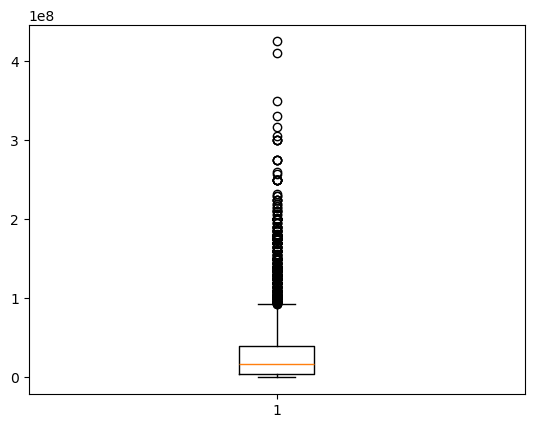

In [14]:
plt.boxplot(movie_budget_df['production_budget'])
plt.show()

In [15]:
# We'll check the columns in movie_gross_df
print(movie_gross_df.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [16]:
# Check if genres is in movies_df
print(movies_df.columns)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [20]:
# Merging on the 'movie' column from movie_budget and the 'title' column from movie_gross
merged_df = pd.merge(movie_budget_df, movie_gross_df, left_on='movie', right_on='title', how='inner')

# Check the first few rows of the merged DataFrame
print(merged_df.head(5))


   id release_date                                        movie  \
0   2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
1   4   2015-05-01                      Avengers: Age of Ultron   
2   7   2018-04-27                       Avengers: Infinity War   
3   9   2017-11-17                               Justice League   
4  10   2015-11-06                                      Spectre   

   production_budget domestic_gross_x worldwide_gross  \
0        410600000.0     $241,063,875  $1,045,663,875   
1        330600000.0     $459,005,868  $1,403,013,963   
2        300000000.0     $678,815,482  $2,048,134,200   
3        300000000.0     $229,024,295    $655,945,209   
4        300000000.0     $200,074,175    $879,620,923   

                                         title studio  domestic_gross_y  \
0  Pirates of the Caribbean: On Stranger Tides     BV       241100000.0   
1                      Avengers: Age of Ultron     BV       459000000.0   
2                       Aveng

We want to visualize multiple factors, like comparing budget vs both domestic gross and foreign gross. A scatter plot will work well here

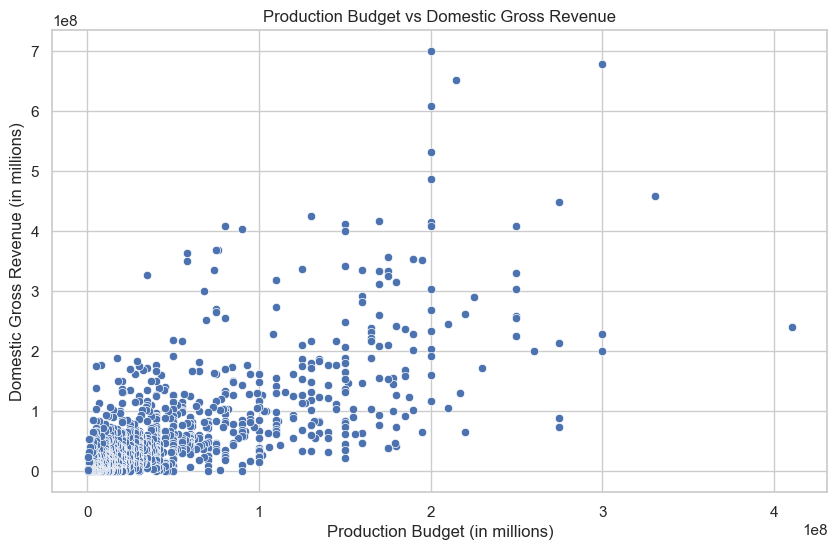

In [24]:

# Set the style for the plots
sns.set(style="whitegrid")

# Scatter plot to visualize the relationship between production_budget and domestic gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='domestic_gross_y', data=merged_df)

# Add labels and title
plt.title('Production Budget vs Domestic Gross Revenue')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Domestic Gross Revenue (in millions)')

# Show the plot
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Nick\AppData\Local\Temp\ipykernel_6184\3481985279.py:2: SyntaxWarning: invalid escape sequence '\$'
  merged_df['domestic_gross_x'] = merged_df['domestic_gross_x'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\Nick\AppData\Local\Temp\ipykernel_6184\3481985279.py:3: SyntaxWarning: invalid escape sequence '\$'
  merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)


   domestic_gross_x  worldwide_gross
0       241063875.0     1.045664e+09
1       459005868.0     1.403014e+09
2       678815482.0     2.048134e+09
3       229024295.0     6.559452e+08
4       200074175.0     8.796209e+08


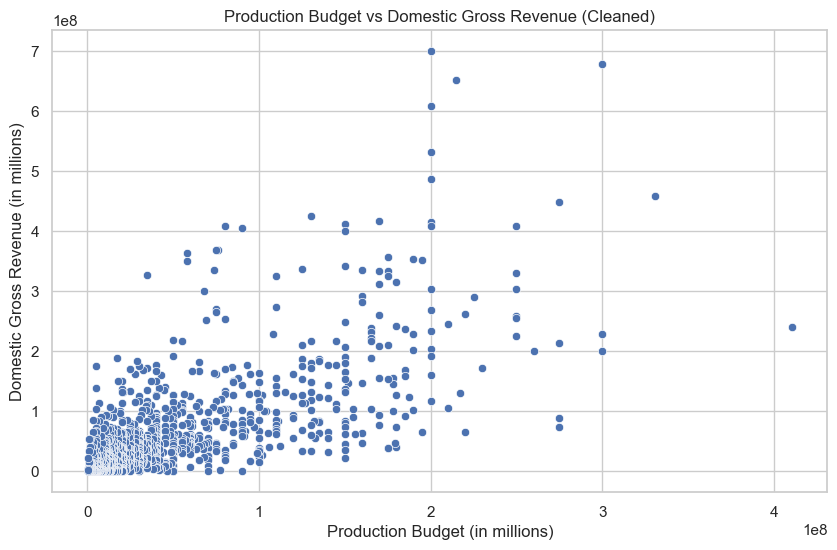

In [26]:
# Remove '$' and ',' from domestic_gross_x and worldwide_gross and convert them to numeric
merged_df['domestic_gross_x'] = merged_df['domestic_gross_x'].replace({'\$': '', ',': ''}, regex=True).astype(float)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check if the cleaning worked
print(merged_df[['domestic_gross_x', 'worldwide_gross']].head())

# Now create a scatter plot using domestic_gross_x
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Scatter plot to visualize the relationship between production_budget and cleaned domestic_gross_x
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='domestic_gross_x', data=merged_df)

# Add labels and title
plt.title('Production Budget vs Domestic Gross Revenue (Cleaned)')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Domestic Gross Revenue (in millions)')

# Show the plot
plt.show()


# Which studios consistently produce the most successful films

## To determine which movie studios consistently produce the most successful films, we'll group the data by studio, summing the domestic and foreign gross revenues. We'll then visualize the top-performing studios using bar plots for better insights

In [31]:
# Group by studio and sum the domestic and foreign gross
studio_performance = movie_gross_df.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

# Calculate total gross by adding domestic and foreign gross
studio_performance['total_gross'] = studio_performance['domestic_gross'] + studio_performance['foreign_gross']

# Sort the studios by total gross in descending order
top_studios = studio_performance.sort_values('total_gross', ascending=False).head(10)



In [34]:
print(top_studios)

         domestic_gross  foreign_gross   total_gross
studio                                              
BV         1.839653e+10   2.579385e+10  4.419038e+10
Fox        1.092450e+10   2.005587e+10  3.098037e+10
WB         1.212360e+10   1.866790e+10  3.079150e+10
Uni.       1.289204e+10   1.685477e+10  2.974681e+10
Sony       8.459479e+09   1.394524e+10  2.240472e+10
Par.       7.580813e+09   1.186338e+10  1.944420e+10
WB (NL)    3.975100e+09   6.339000e+09  1.031410e+10
LGF        3.991851e+09   4.475619e+09  8.467471e+09
LG/S       1.965200e+09   3.353724e+09  5.318924e+09
P/DW       1.682900e+09   3.393600e+09  5.076500e+09


In [35]:
# For easier plotting we weill use this code
top_studios = top_studios.reset_index()

C:\Users\Nick\AppData\Local\Temp\ipykernel_6184\2655852769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='domestic_gross', y='studio', data=top_studios, palette='Blues_d')
C:\Users\Nick\AppData\Local\Temp\ipykernel_6184\2655852769.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foreign_gross', y='studio', data=top_studios, palette='Greens_d')
C:\Users\Nick\AppData\Local\Temp\ipykernel_6184\2655852769.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_gross', y='studio', data=top_studios, palette='Reds_d')


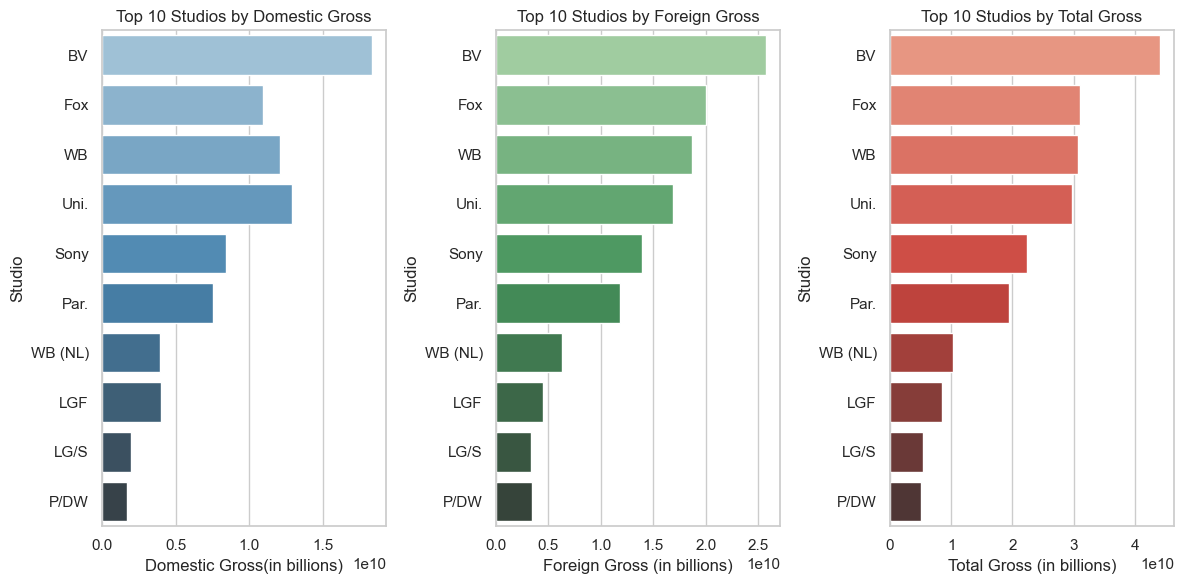

In [37]:
# We will visualize the top 10 studios based on domestic, foreign and total gross
plt.figure(figsize=(12, 6))

# Plot for domestic gross
plt.subplot(1, 3, 1)
sns.barplot(x='domestic_gross', y='studio', data=top_studios, palette='Blues_d')
plt.title('Top 10 Studios by Domestic Gross')
plt.xlabel('Domestic Gross(in billions)')
plt.ylabel('Studio')

# Plot for foreign gross
plt.subplot(1, 3, 2)
sns.barplot(x='foreign_gross', y='studio', data=top_studios, palette='Greens_d')
plt.title('Top 10 Studios by Foreign Gross')
plt.xlabel('Foreign Gross (in billions)')
plt.ylabel('Studio')

# Plot for total gross
plt.subplot(1, 3, 3)
sns.barplot(x='total_gross', y='studio', data=top_studios, palette='Reds_d')
plt.title('Top 10 Studios by Total Gross')
plt.xlabel('Total Gross (in billions)')
plt.ylabel('Studio')

plt.tight_layout()
plt.show()